In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

In [11]:
df = pd.read_csv("../data/train.csv")
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [19]:
for col in df.drop('image_id', axis=1).columns:
    print(f"         '{col}': unique values and shape")
    uq = df[col].unique()
    print(uq)
    print(uq.shape)

         'label': unique values and shape
['bacterial_leaf_blight' 'bacterial_leaf_streak'
 'bacterial_panicle_blight' 'blast' 'brown_spot' 'dead_heart'
 'downy_mildew' 'hispa' 'normal' 'tungro']
(10,)
         'variety': unique values and shape
['ADT45' 'IR20' 'KarnatakaPonni' 'Onthanel' 'Ponni' 'Surya' 'Zonal'
 'AndraPonni' 'AtchayaPonni' 'RR']
(10,)
         'age': unique values and shape
[45 50 55 60 65 68 70 72 47 77 67 73 75 80 62 66 57 82]
(18,)


In [20]:
df['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

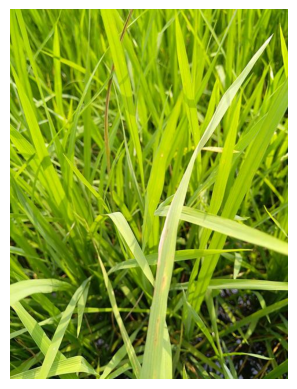

In [25]:
row = df.iloc[0]
img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

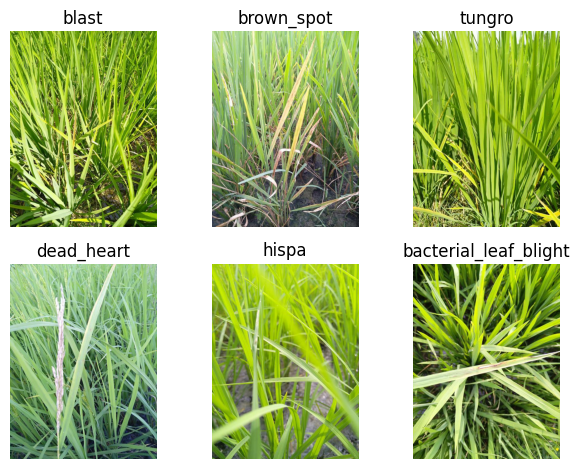

In [28]:
classes = df['label'].unique()
sampled_classes = random.sample(list(classes), 6)

for i, cls in enumerate(sampled_classes, 1):
    # just pick a random row for this class
    row = df[df['label'] == cls].sample(1).iloc[0]
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    img = Image.open(img_path)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cls)
plt.tight_layout()
plt.show()

In [29]:
dims = []
for i, row in df.iterrows():
    img_path = os.path.join("..", "data", "train_images", row['label'], row['image_id'])
    with Image.open(img_path) as img:
        w, h = img.size
        dims.append((row['image_id'], row['label'], w, h))

dim_df = pd.DataFrame(dims, columns=["image_id", "label", "width", "height"])

In [32]:
dim_df.describe()

,width,height
count,10407.000000,10407.000000
mean,480.061497,639.938503
std,3.136350,3.136350
min,480.000000,480.000000
25%,480.000000,640.000000
50%,480.000000,640.000000
75%,480.000000,640.000000
max,640.000000,640.000000


In [33]:
dim_df['width'].value_counts()

width
480    10403
640        4
Name: count, dtype: int64

In [34]:
dim_df['height'].value_counts()

height
640    10403
480        4
Name: count, dtype: int64